# LIBRARIES

In [17]:
import json
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

# link that helped 
https://towardsdatascience.com/pca-with-numpy-58917c1d0391

# Dataset

In [8]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None)
iris.columns = ["sepal_length","sepal_width",
                'petal_length','petal_width','species']
iris.dropna(how='all', inplace=True)
iris.head()
print(iris)


HTTPError: HTTP Error 403: Forbidden

In [18]:
# TAKE THE DATA FROM JSON
with open('../Simulation/data_pos_sim.json') as f:
    data_dict = json.load(f)

data_list = [data_dict['LF'],data_dict['RF']]
data_array = np.array(data_list).T

# DATA FRAME PANDAS
angle_df = pd.DataFrame(data=data_array,columns = ['angleLF','angleRF']) 
angle_df.dropna(how='all', inplace=True)
angle_df.head()


,angleLF,angleRF
0,73.060567,89.0
1,72.502128,88.0
2,71.935614,87.0
3,71.361467,86.0
4,70.780101,85.0


# Visualizing Data

In [10]:
# Plotting data using seaborn
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width,
               hue = iris.species, style=iris.species)

NameError: name 'iris' is not defined

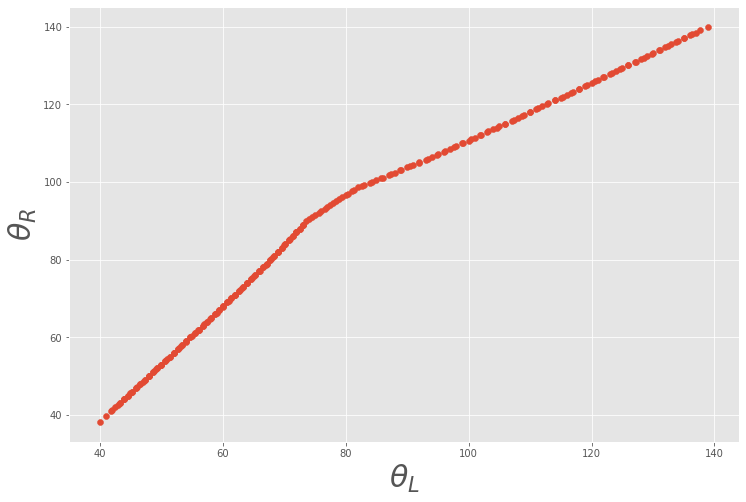

In [24]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots()
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
#plt.title("Raw Data")
plt.scatter(angle_df.angleLF.values, angle_df.angleRF.values)
plt.ylabel(r'$\theta_R$')
plt.xlabel(r'$\theta_L$')
plt.savefig("raw_data_rolling_square25_sim.png")


# Standardizing the Data

In [6]:
def standardize_data(arr): 
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    for column in range(columns):  
        mean = np.mean(arr[:,column])
        std = np.std(arr[:,column])
        tempArray = np.empty(0)
        for element in arr[:,column]:
            tempArray = np.append(tempArray, ((element - mean) / std))
        standardizedArray[:,column] = tempArray
    return standardizedArray

$z = \frac{x_i - \mu(x)}{\sigma(x)}$

In [7]:
# Standardizing data
X = iris.iloc[:, 0:4].values
y = iris.species.values
X = standardize_data(X)

test = X.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test[0],test[1])
plt.grid()
plt.show()
plt.close()

NameError: name 'iris' is not defined

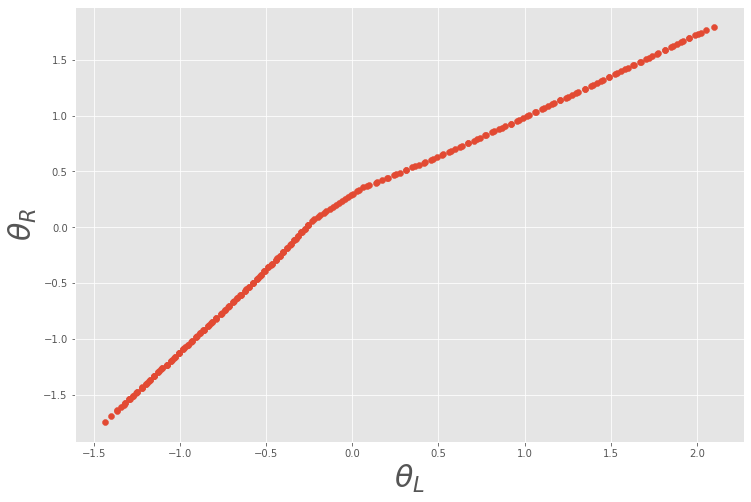

In [31]:
# Standardizing data
angle_std = angle_df.values
angle_std = standardize_data(angle_std)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["figure.figsize"] = (12,8)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(angle_std.T[0],angle_std.T[1])
#plt.title("Standardized Data")
plt.ylabel(r'$\theta_R$')
plt.xlabel(r'$\theta_L$')
plt.savefig("raw_data_std_rolling_square25_sim.png")

# Computing the Eigenvectors and Eigenvalues

In [32]:
#Calculating the covariance matrix
covariance_matrix = np.cov(X.T)
print(covariance_matrix,"\n")

# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

# Calculating the explained variance on each of components
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

NameError: name 'X' is not defined

In [33]:
#Calculating the covariance matrix
cov_matrix = np.cov(angle_std.T)
print(cov_matrix,"\n")

# Using np.linalg.eig function
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
# eigen_vec(:,i) is an eigenvector
print("Eigenvector: \n",eigen_vec,"\n")
print("Eigenvalues: \n", eigen_val, "\n")

# Calculating the explained variance on each of components
var_explained = []
for i in eigen_val:
     var_explained.append((i/sum(eigen_val))*100)
print("Explained variance: \n",var_explained,"\n")

# Sort the egeinvalues and the eigenvectors accordingly
rows, columns = eigen_vec.shape
temp_eigen_val = np.zeros(columns)
temp_eigen_vec = np.zeros((rows,columns))
index_sort = np.argsort(-eigen_val) # the - is for descending
for i in range(columns):
    temp_eigen_val[i] = eigen_val[index_sort[i]]
    temp_eigen_vec[:,i] = eigen_vec[:,index_sort[i]]
eigen_val = temp_eigen_val
eigen_vec = temp_eigen_vec

[[1.00409836 0.98839197]
 [0.98839197 1.00409836]] 

Eigenvector: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] 

Eigenvalues: 
 [1.99249033 0.01570639] 

Explained variance: 
 [99.21788587042768, 0.782114129572323] 



# PROJECTION ON PCs

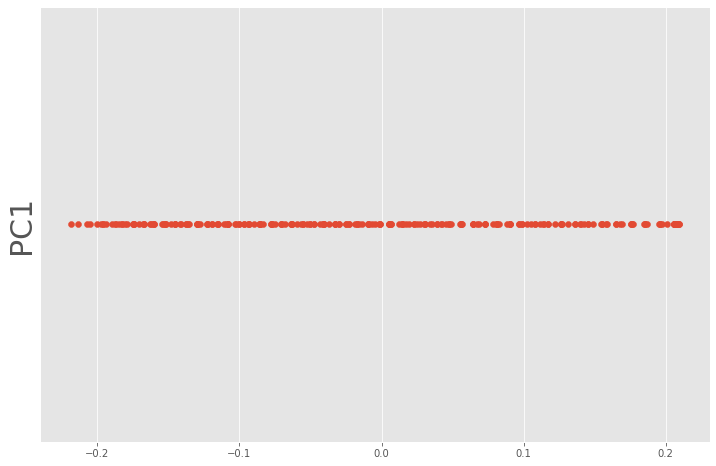

In [39]:
# Projection on PC1
PC1 = np.array([eigen_vec[:,1]])
angle_pca_1D = np.matmul(PC1,angle_std.T)
angle_pca_1D = np.append(angle_pca_1D, np.full((1,245),eigen_val[1]), axis=0)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

fig, ax = plt.subplots()
ax.axes.yaxis.set_ticks([])
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
plt.scatter(angle_pca_1D[0],angle_pca_1D[1])
plt.ylabel("PC1")
plt.savefig("1D_PCA_proj_std_angles.png")
#plt.title("1D PC projection scatter of standardised angles")


# TEST